In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9) #차트 기본 크기 지정

In [4]:
!pip install seaborn

     -------------------------------------- 292.8/292.8 kB 9.1 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 10.5 MB/s eta 0:00:00


In [6]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })


In [7]:
df = pd.read_csv('https://bit.ly/ds-house-price-clean')
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


In [8]:
df.shape

(3293, 5)

In [9]:
df.describe()

,연도,월,분양가
count,3293.000000,3293.000000,3293.000000
mean,2017.406316,6.577285,3294.067112
std,1.309646,3.588813,1321.781979
min,2015.000000,1.000000,1868.000000
25%,2016.000000,3.000000,2478.000000
50%,2017.000000,7.000000,2887.000000
75%,2019.000000,10.000000,3632.000000
max,2020.000000,12.000000,13835.000000


In [10]:
df.head()

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


<AxesSubplot:>

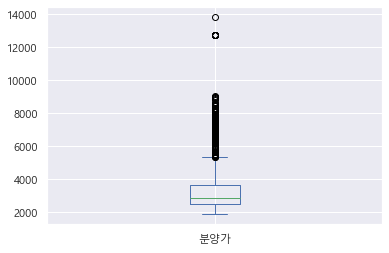

In [11]:
df['분양가'].plot(kind='box')

In [12]:
df[df['분양가'] >= 5000]

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3236,서울,85㎡초과 102㎡이하,2020,2,13835
3237,서울,102㎡초과,2020,2,9039
3244,경기,85㎡초과 102㎡이하,2020,2,5418
3245,경기,102㎡초과,2020,2,5133


In [14]:
df_5000 = df[df['분양가'] >= 5000]

In [15]:
df_5000.groupby(['지역', '규모']).count()

연도   월  분양가
지역 규모                        
경기  102㎡초과        12  12   12
    85㎡초과 102㎡이하  12  12   12
대구  102㎡초과         9   9    9
서울  102㎡초과        53  53   53
    60㎡이하         53  53   53
    60㎡초과 85㎡이하   53  53   53
    85㎡초과 102㎡이하  53  53   53
인천  102㎡초과         3   3    3
제주  60㎡이하         12  12   12

In [16]:
df_5000.value_counts('지역')

지역
서울    212
경기     24
제주     12
대구      9
인천      3
dtype: int64

<AxesSubplot:ylabel='None'>

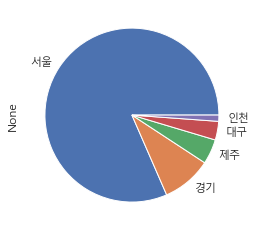

In [18]:
df_5000.value_counts('지역').plot(kind='pie')

In [29]:
df_5000[df_5000['지역']=='서울' | df_5000['지역']=='경기']

TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]

In [20]:
df_5000['지역']=='서울'

0        True
1        True
2        True
3        True
64       True
        ...  
3236     True
3237     True
3244    False
3245    False
3253    False
Name: 지역, Length: 260, dtype: bool

In [32]:
(df_5000['지역']=='서울') | (df_5000['지역']=='경기')

0        True
1        True
2        True
3        True
64       True
        ...  
3236     True
3237     True
3244     True
3245     True
3253    False
Name: 지역, Length: 260, dtype: bool

In [30]:
df_5000['지역']=='경기'

0       False
1       False
2       False
3       False
64      False
        ...  
3236    False
3237    False
3244     True
3245     True
3253    False
Name: 지역, Length: 260, dtype: bool

In [33]:
df_5000[(df_5000['지역']=='서울') | (df_5000['지역']=='경기')]

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835
3237,서울,102㎡초과,2020,2,9039
3244,경기,85㎡초과 102㎡이하,2020,2,5418


In [35]:
df_5000[df_5000['지역']=='서울' | '경기']

TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [36]:
res = []
for i in df_5000['지역']:
    if i in ['서울','경기']:
        res.append('수도권')
    else:
        res.append('지방권')

In [37]:
df_5000['구분'] = res
df_5000

C:\Users\user\AppData\Local\Temp\ipykernel_12156\2196292498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5000['구분'] = res


,지역,규모,연도,월,분양가,구분
0,서울,60㎡이하,2015,10,5652,수도권
1,서울,60㎡초과 85㎡이하,2015,10,5882,수도권
2,서울,85㎡초과 102㎡이하,2015,10,5721,수도권
3,서울,102㎡초과,2015,10,5879,수도권
64,서울,60㎡이하,2015,11,6320,수도권
...,...,...,...,...,...,...
3236,서울,85㎡초과 102㎡이하,2020,2,13835,수도권
3237,서울,102㎡초과,2020,2,9039,수도권
3244,경기,85㎡초과 102㎡이하,2020,2,5418,수도권
3245,경기,102㎡초과,2020,2,5133,수도권


In [38]:
df_5000['구분'].value_counts()

수도권    236
지방권     24
Name: 구분, dtype: int64

<AxesSubplot:ylabel='구분'>

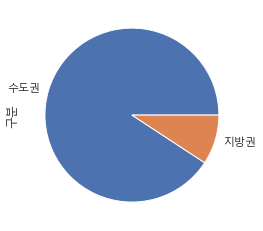

In [39]:
df_5000['구분'].value_counts().plot(kind='pie')

In [40]:
df['지역'].unique()

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [41]:
df_5000['지역'].unique()

array(['서울', '대구', '제주', '경기', '인천'], dtype=object)

In [42]:
len(df[df['지역'] == '서울'])

212

In [44]:
len(df_5000[df_5000['지역'] == '서울'])

212

In [43]:
len(df_5000[df_5000['지역'] == '서울']) / len(df[df['지역'] == '서울'])

1.0

In [45]:
df['지역'].value_counts()

서울    212
경기    212
부산    212
충북    212
전북    209
전남    208
인천    208
경남    207
강원    204
대구    203
경북    200
충남    200
세종    197
제주    177
광주    160
대전    157
울산    115
Name: 지역, dtype: int64

In [52]:
t1 = df_5000['지역'].value_counts()
t1

서울    212
경기     24
제주     12
대구      9
인천      3
Name: 지역, dtype: int64

In [47]:
df_5000['지역'].unique()

array(['서울', '대구', '제주', '경기', '인천'], dtype=object)

In [48]:
name_5000 = df_5000['지역'].unique()

In [53]:
t2 = df['지역'].value_counts()[name_5000]
t2

서울    212
대구    203
제주    177
경기    212
인천    208
Name: 지역, dtype: int64

In [54]:
df_1 = pd.concat([t1, t2], axis=1)
df_1

,지역,지역
서울,212,212
경기,24,212
제주,12,177
대구,9,203
인천,3,208


In [55]:
df.groupby(['지역','규모']).count()

연도   월  분양가
지역 규모                        
강원  102㎡초과        53  53   53
    60㎡이하         53  53   53
    60㎡초과 85㎡이하   53  53   53
    85㎡초과 102㎡이하  45  45   45
경기  102㎡초과        53  53   53
...               ..  ..  ...
충남  85㎡초과 102㎡이하  42  42   42
충북  102㎡초과        53  53   53
    60㎡이하         53  53   53
    60㎡초과 85㎡이하   53  53   53
    85㎡초과 102㎡이하  53  53   53

[68 rows x 3 columns]

In [56]:
df.groupby(['지역','규모']).count().unstack(1)

연도                                         월                      \
규모  102㎡초과  60㎡이하  60㎡초과 85㎡이하  85㎡초과 102㎡이하  102㎡초과  60㎡이하  60㎡초과 85㎡이하   
지역                                                                         
강원      53     53           53            45      53     53           53   
경기      53     53           53            53      53     53           53   
경남      50     51           53            53      50     51           53   
경북      53     53           53            41      53     53           53   
광주      40     48           53            19      40     48           53   
대구      53     53           53            44      53     53           53   
대전      30     47           53            27      30     47           53   
부산      53     53           53            53      53     53           53   
서울      53     53           53            53      53     53           53   
세종      53     38           53            53      53     38           53   
울산      26     32           44            13      26     32           44   
인천      49     53           53            53      49     53           53   
전남      53     53           53            49      53     53           53   
전북      53     53           53            50      53     53           53   
제주      49     41           53            34      49     41           53   
충남      52     53           53            42      52     53           53   
충북      53     53           53            53      53     53           53   

                     분양가                                    
규모  85㎡초과 102㎡이하  102㎡초과  60㎡이하  60㎡초과 85㎡이하  85㎡초과 102㎡이하  
지역                                                          
강원            45      53     53           53            45  
경기            53      53     53           53            53  
경남            53      50     51           53            53  
경북            41      53     53           53            41  
광주            19      40     48           53            19  
대구            44      53     53           53            44  
대전            27      30     47           53            27  
부산            53      53     53           53            53  
서울            53      53     53           53            53  
세종            53      53     38           53            53  
울산            13      26     32           44            13  
인천            53      49     53           53            53  
전남            49      53     53           53            49  
전북            50      53     53           53            50  
제주            34      49     41           53            34  
충남            42      52     53           53            42  
충북            53      53     53           53            53

In [57]:
df.groupby(['지역','규모']).count().unstack(1)['분양가']

규모,102㎡초과,60㎡이하,60㎡초과 85㎡이하,85㎡초과 102㎡이하
지역,,,,
강원,53,53,53,45
경기,53,53,53,53
경남,50,51,53,53
경북,53,53,53,41
광주,40,48,53,19
대구,53,53,53,44
대전,30,47,53,27
부산,53,53,53,53
서울,53,53,53,53


In [58]:
['수도권' if i=='서울' or i=='경기' else '지방권' for i in df['지역']]

['수도권',
 '수도권',
 '수도권',
 '수도권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '수도권',
 '수도권',
 '수도권',
 '수도권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '수도권',
 '수도권',
 '수도권',
 '수도권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '수도권',
 '수도권',
 '수도권',
 '수도권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',
 '지방권',


In [59]:
import random

my_list = ['삼성전자','LG전자','BTS','블랙핑크','YG']
random.shuffle(my_list)
print(my_list)

['BTS', 'YG', '삼성전자', '블랙핑크', 'LG전자']


In [60]:
df_5000['구분1'] =  ['수도권' if i in ['경기', '서울'] else '지방권' for i in df_5000['지역']]

C:\Users\user\AppData\Local\Temp\ipykernel_12156\241774558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5000['구분1'] =  ['수도권' if i in ['경기', '서울'] else '지방권' for i in df_5000['지역']]


In [61]:
df_5000

,지역,규모,연도,월,분양가,구분,구분1
0,서울,60㎡이하,2015,10,5652,수도권,수도권
1,서울,60㎡초과 85㎡이하,2015,10,5882,수도권,수도권
2,서울,85㎡초과 102㎡이하,2015,10,5721,수도권,수도권
3,서울,102㎡초과,2015,10,5879,수도권,수도권
64,서울,60㎡이하,2015,11,6320,수도권,수도권
...,...,...,...,...,...,...,...
3236,서울,85㎡초과 102㎡이하,2020,2,13835,수도권,수도권
3237,서울,102㎡초과,2020,2,9039,수도권,수도권
3244,경기,85㎡초과 102㎡이하,2020,2,5418,수도권,수도권
3245,경기,102㎡초과,2020,2,5133,수도권,수도권


In [65]:
def test(n):
    if n in ['서울', '경기', '인천']:
        result = '수도권'
    else:
        result = '지방권'
    return result

# df_5000['구분2'] = df_5000['지역'].map(test)

In [64]:
df_5000

,지역,규모,연도,월,분양가,구분,구분1,구분2
0,서울,60㎡이하,2015,10,5652,수도권,수도권,수도권
1,서울,60㎡초과 85㎡이하,2015,10,5882,수도권,수도권,수도권
2,서울,85㎡초과 102㎡이하,2015,10,5721,수도권,수도권,수도권
3,서울,102㎡초과,2015,10,5879,수도권,수도권,수도권
64,서울,60㎡이하,2015,11,6320,수도권,수도권,수도권
...,...,...,...,...,...,...,...,...
3236,서울,85㎡초과 102㎡이하,2020,2,13835,수도권,수도권,수도권
3237,서울,102㎡초과,2020,2,9039,수도권,수도권,수도권
3244,경기,85㎡초과 102㎡이하,2020,2,5418,수도권,수도권,수도권
3245,경기,102㎡초과,2020,2,5133,수도권,수도권,수도권


In [66]:
df['구분'] = df['지역'].map(test)

In [67]:
df

,지역,규모,연도,월,분양가,구분
0,서울,60㎡이하,2015,10,5652,수도권
1,서울,60㎡초과 85㎡이하,2015,10,5882,수도권
2,서울,85㎡초과 102㎡이하,2015,10,5721,수도권
3,서울,102㎡초과,2015,10,5879,수도권
4,인천,60㎡이하,2015,10,3488,수도권
...,...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065,지방권
3289,경남,85㎡초과 102㎡이하,2020,2,3247,지방권
3290,제주,60㎡이하,2020,2,4039,지방권
3291,제주,60㎡초과 85㎡이하,2020,2,3962,지방권


In [68]:
df[df['지역']=='경기']

,지역,규모,연도,월,분양가,구분
8,경기,60㎡이하,2015,10,3126,수도권
9,경기,60㎡초과 85㎡이하,2015,10,3239,수도권
10,경기,85㎡초과 102㎡이하,2015,10,3496,수도권
11,경기,102㎡초과,2015,10,3680,수도권
72,경기,60㎡이하,2015,11,3079,수도권
...,...,...,...,...,...,...
3186,경기,102㎡초과,2020,1,5204,수도권
3242,경기,60㎡이하,2020,2,4918,수도권
3243,경기,60㎡초과 85㎡이하,2020,2,4402,수도권
3244,경기,85㎡초과 102㎡이하,2020,2,5418,수도권


In [78]:
dict = {
    '경기': ['서울', '인천', '경기'],
    '관동': ['강원'],
    '호서': ['대전', '세종', '충북', '충남'],
    '호남': ['광주', '전북', '전남'],
    '영남': ['부산', '대구', '울산', '경북', '경남'],
    '제주': ['제주']
}

dict.keys()

res = []
for i in df['지역']:
    for j in dict.keys():
        if i in dict[j]:
            res.append(j)
            break

len(res)

df['지역'].unique()

df['질문'] = res
df



In [83]:
dt={
    '경기 지방':['서울', '인천', '경기'],
    '관동 지방':['강원'],
    '호서 지방':['대전','세종','충남','충북'],
    '호남 지방':['광주','전남','전북'],
    '영남 지방':['부산','대구','울산','경남','경북'],
    '제주 지방':['제주']
}



In [84]:
for i in dt:
    print(i)

경기 지방
관동 지방
호서 지방
호남 지방
영남 지방
제주 지방


In [85]:
for k,v in dt.items():
    print(k,v)

경기 지방 ['서울', '인천', '경기']
관동 지방 ['강원']
호서 지방 ['대전', '세종', '충남', '충북']
호남 지방 ['광주', '전남', '전북']
영남 지방 ['부산', '대구', '울산', '경남', '경북']
제주 지방 ['제주']


In [86]:
res = []
for i in df['지역']:
    for  key, value in dt.items():
        if i in value:
            res.append(key)
res

['경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '호남 지방',
 '호남 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '관동 지방',
 '관동 지방',
 '관동 지방',
 '관동 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '호남 지방',
 '호남 지방',
 '호남 지방',
 '호남 지방',
 '호남 지방',
 '호남 지방',
 '호남 지방',
 '호남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '제주 지방',
 '제주 지방',
 '제주 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '경기 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '호남 지방',
 '호남 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '영남 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '호서 지방',
 '관동 지방',
 '관동 지방',
 '관동 지방',


In [87]:
df['구분2'] = res

In [88]:
df

,지역,규모,연도,월,분양가,구분,질문,구분2
0,서울,60㎡이하,2015,10,5652,수도권,경기,경기 지방
1,서울,60㎡초과 85㎡이하,2015,10,5882,수도권,경기,경기 지방
2,서울,85㎡초과 102㎡이하,2015,10,5721,수도권,경기,경기 지방
3,서울,102㎡초과,2015,10,5879,수도권,경기,경기 지방
4,인천,60㎡이하,2015,10,3488,수도권,경기,경기 지방
...,...,...,...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065,지방권,영남,영남 지방
3289,경남,85㎡초과 102㎡이하,2020,2,3247,지방권,영남,영남 지방
3290,제주,60㎡이하,2020,2,4039,지방권,제주,제주 지방
3291,제주,60㎡초과 85㎡이하,2020,2,3962,지방권,제주,제주 지방


In [89]:
df.head()

,지역,규모,연도,월,분양가,구분,질문,구분2
0,서울,60㎡이하,2015,10,5652,수도권,경기,경기 지방
1,서울,60㎡초과 85㎡이하,2015,10,5882,수도권,경기,경기 지방
2,서울,85㎡초과 102㎡이하,2015,10,5721,수도권,경기,경기 지방
3,서울,102㎡초과,2015,10,5879,수도권,경기,경기 지방
4,인천,60㎡이하,2015,10,3488,수도권,경기,경기 지방


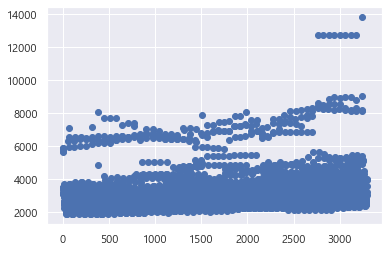

In [90]:
plt.scatter(df.index, df['분양가'])

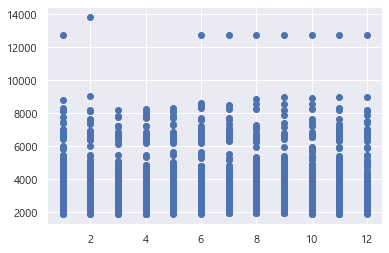

In [91]:
plt.scatter(df['월'], df['분양가'])

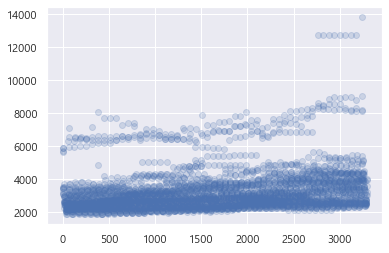

In [93]:
plt.scatter(df.index, df['분양가'], alpha=0.2)

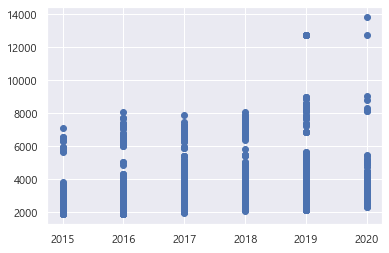

In [94]:
plt.scatter(df['연도'], df['분양가'])

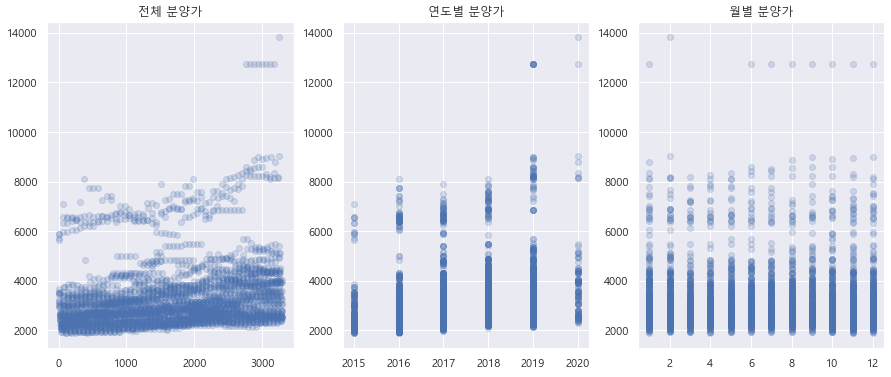

In [99]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.scatter(df.index, df['분양가'], alpha=0.2)
plt.title('전체 분양가')
plt.subplot(1,3,2)
plt.scatter(df['연도'], df['분양가'], alpha=0.2)
plt.title('연도별 분양가')
plt.subplot(1,3,3)
plt.scatter(df['월'], df['분양가'], alpha=0.2)
plt.title('월별 분양가')
plt.show()

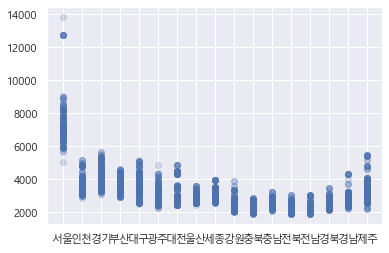

In [103]:
plt.scatter(df['지역'], df['분양가'], alpha=0.2)

In [106]:
names = df['지역'].unique()
names

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [107]:
df[df['지역'] == '서울']

,지역,규모,연도,월,분양가,구분,질문,구분2
0,서울,60㎡이하,2015,10,5652,수도권,경기,경기 지방
1,서울,60㎡초과 85㎡이하,2015,10,5882,수도권,경기,경기 지방
2,서울,85㎡초과 102㎡이하,2015,10,5721,수도권,경기,경기 지방
3,서울,102㎡초과,2015,10,5879,수도권,경기,경기 지방
64,서울,60㎡이하,2015,11,6320,수도권,경기,경기 지방
...,...,...,...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779,수도권,경기,경기 지방
3234,서울,60㎡이하,2020,2,8193,수도권,경기,경기 지방
3235,서울,60㎡초과 85㎡이하,2020,2,8140,수도권,경기,경기 지방
3236,서울,85㎡초과 102㎡이하,2020,2,13835,수도권,경기,경기 지방


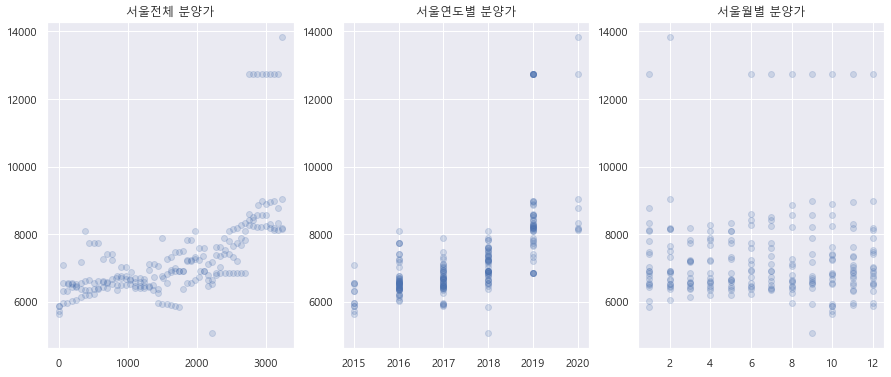

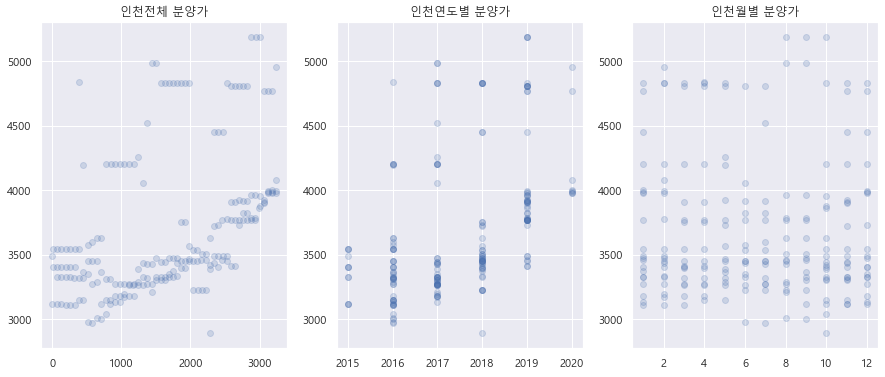

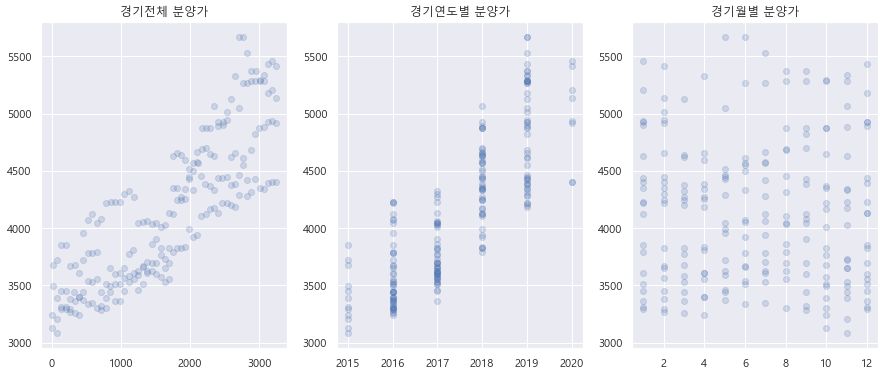

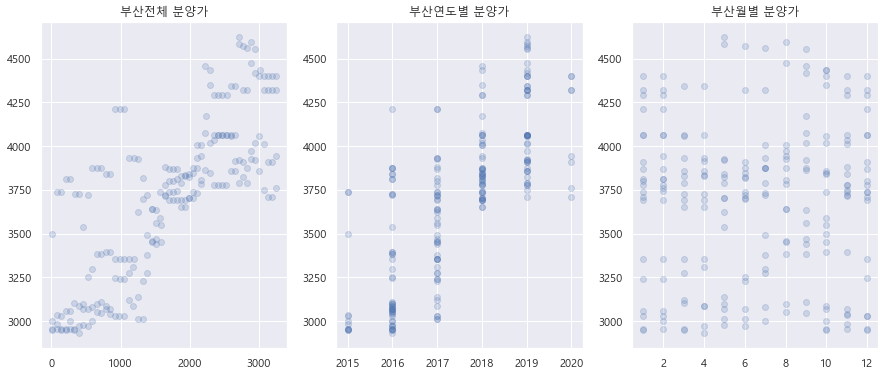

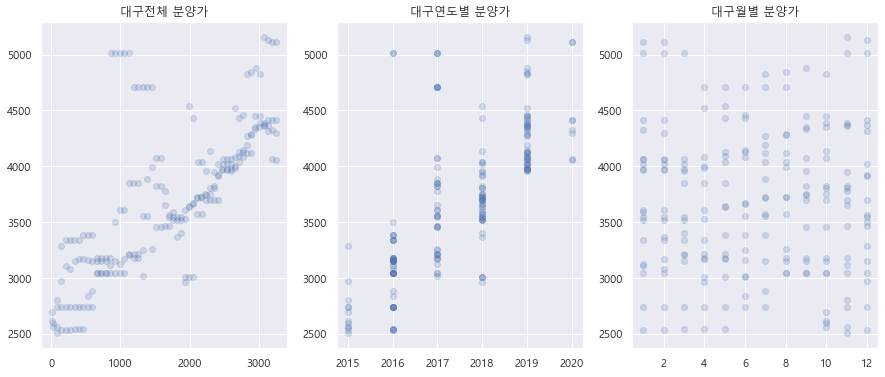

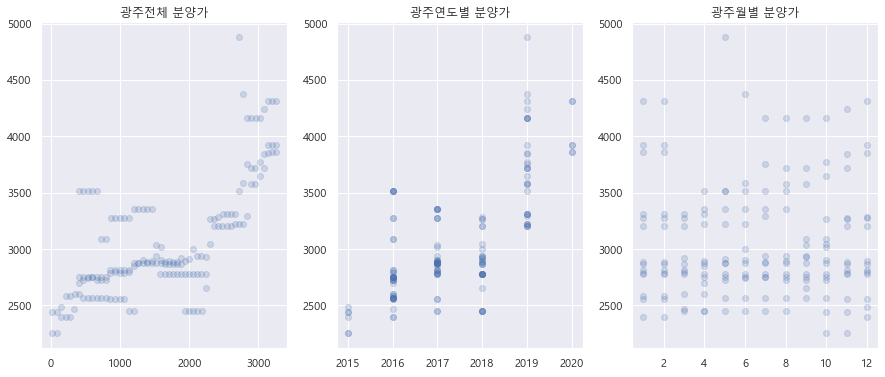

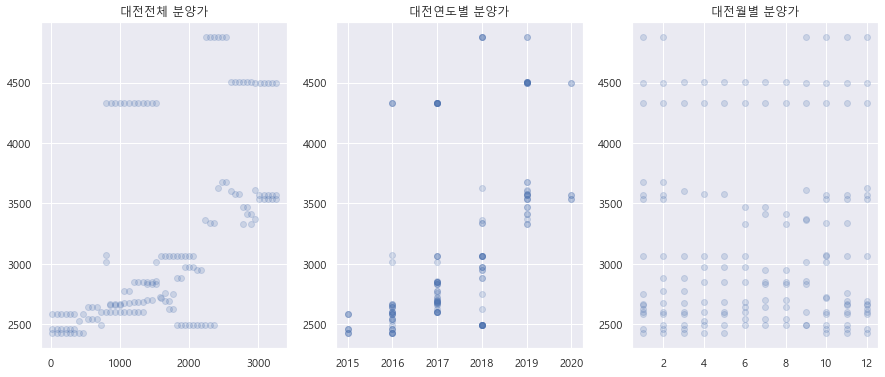

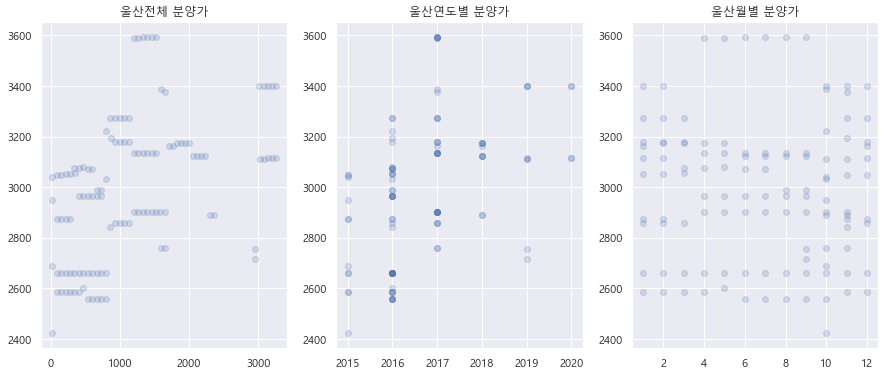

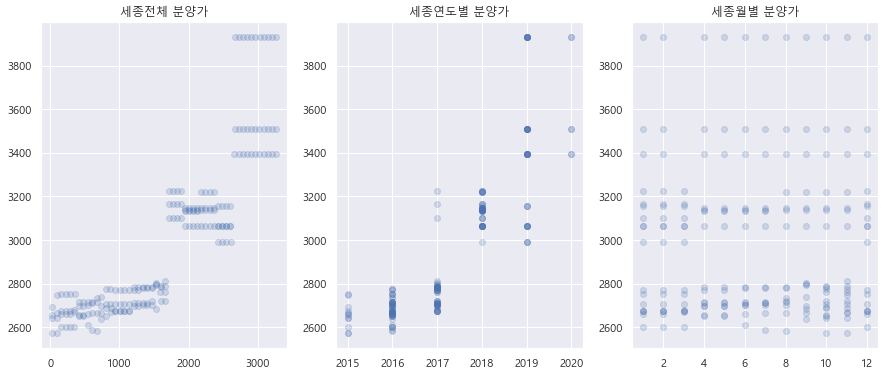

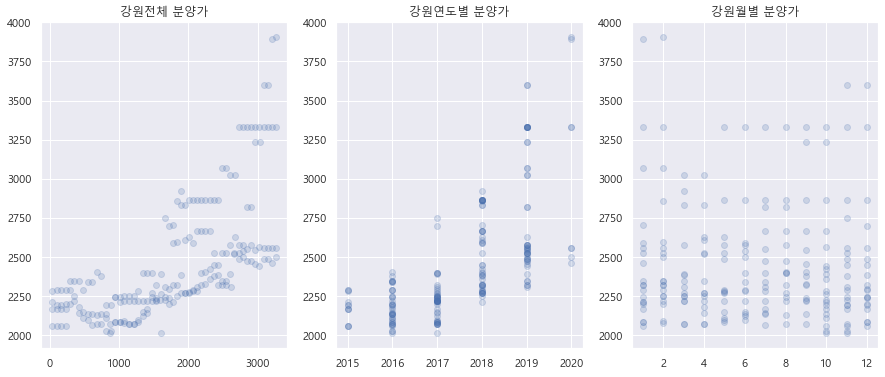

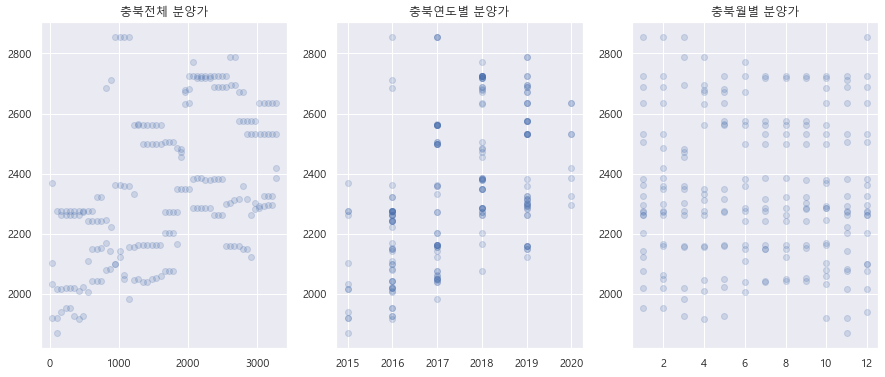

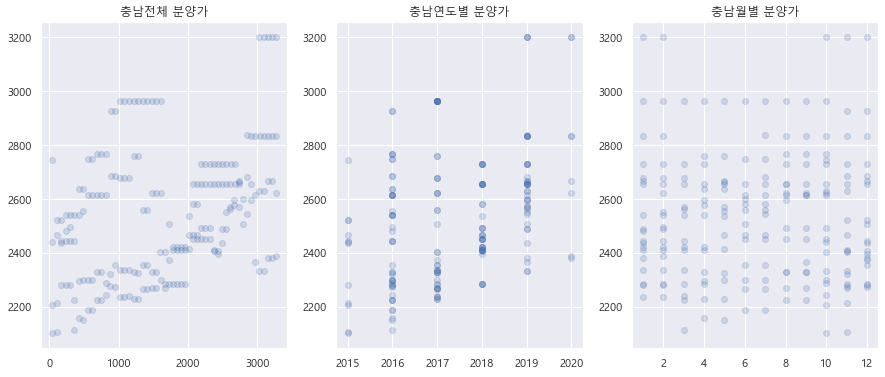

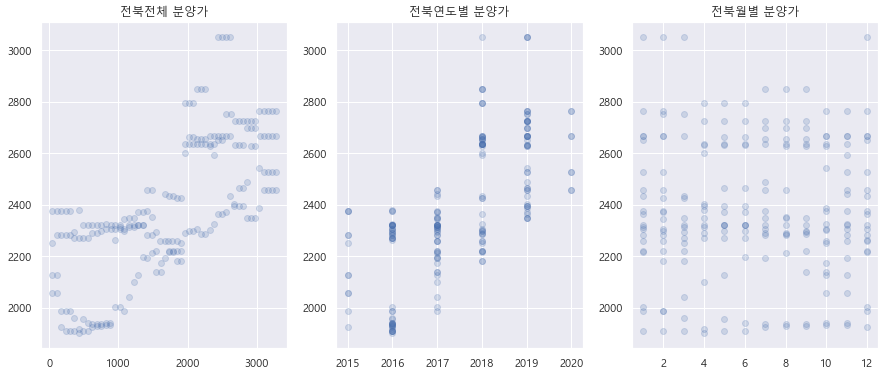

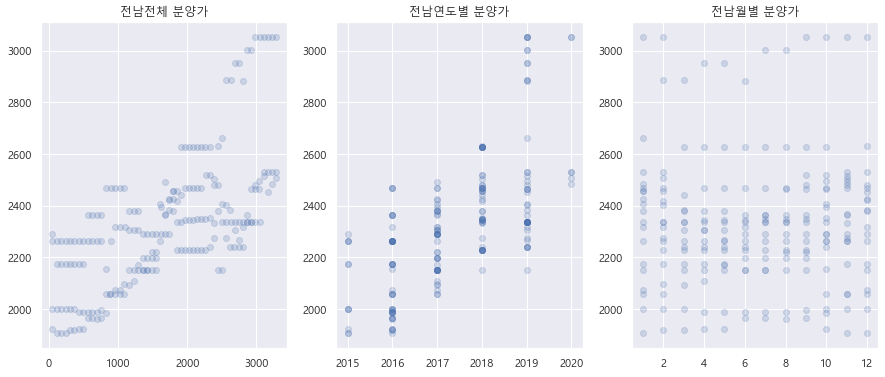

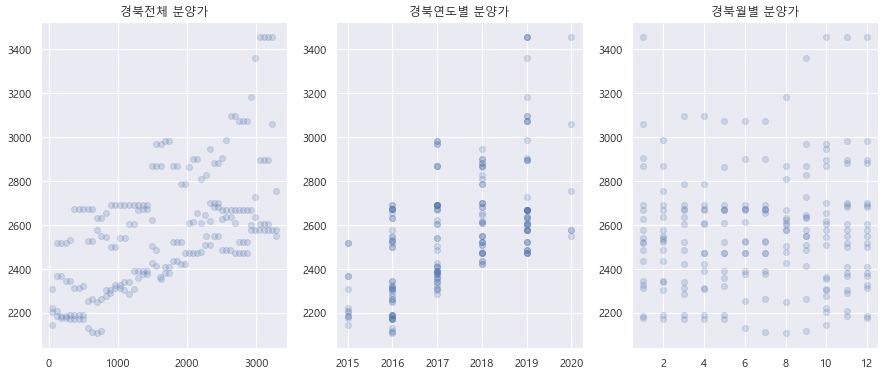

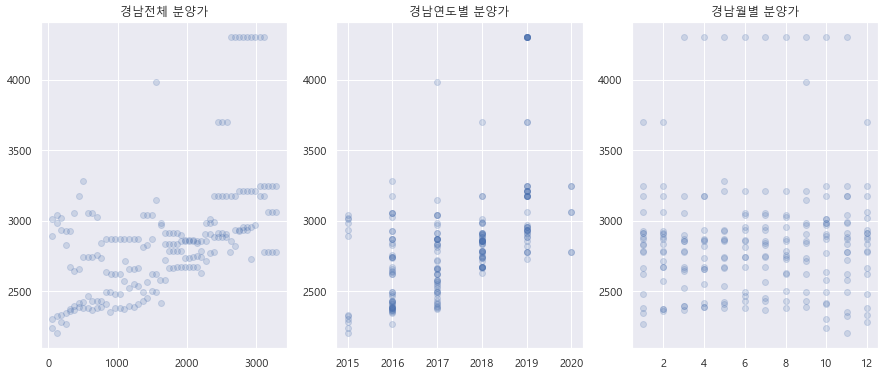

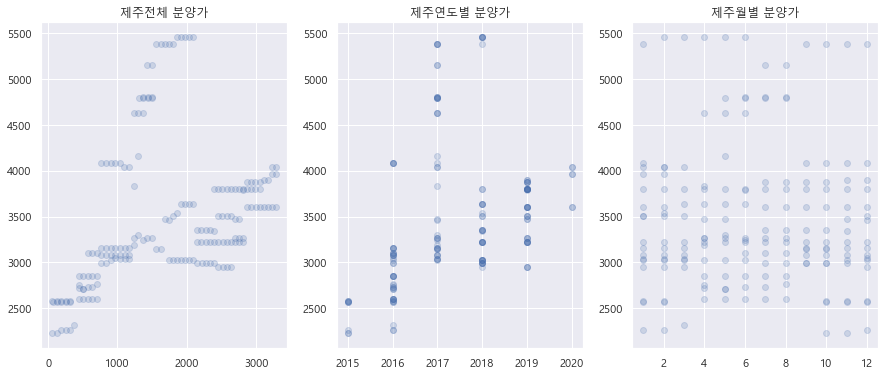

In [109]:
for name in names:
    tmp = df[df['지역'] == name]
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    plt.scatter(tmp.index, tmp['분양가'], alpha=0.2)
    plt.title(f'{name}전체 분양가')
    plt.subplot(1,3,2)
    plt.scatter(tmp['연도'], tmp['분양가'], alpha=0.2)
    plt.title(f'{name}연도별 분양가')
    plt.subplot(1,3,3)
    plt.scatter(tmp['월'], tmp['분양가'], alpha=0.2)
    plt.title(f'{name}월별 분양가')
    plt.show()

In [110]:
np.arange(1, 51)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

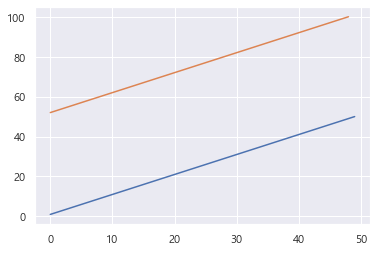

In [111]:
data = np.arange(1, 51)
plt.plot(data)
data2 = np.arange(52, 101)
plt.plot(data2)

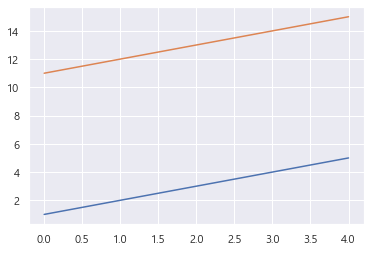

In [112]:
d1 = [1,2,3,4,5]
d2 = [11,12,13,14,15]

plt.plot(d1)
plt.plot(d2)

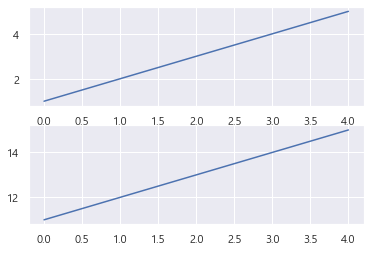

In [113]:
d1 = [1,2,3,4,5]
d2 = [11,12,13,14,15]

plt.subplot(2,1,1)
plt.plot(d1)
plt.subplot(2,1,2)
plt.plot(d2)

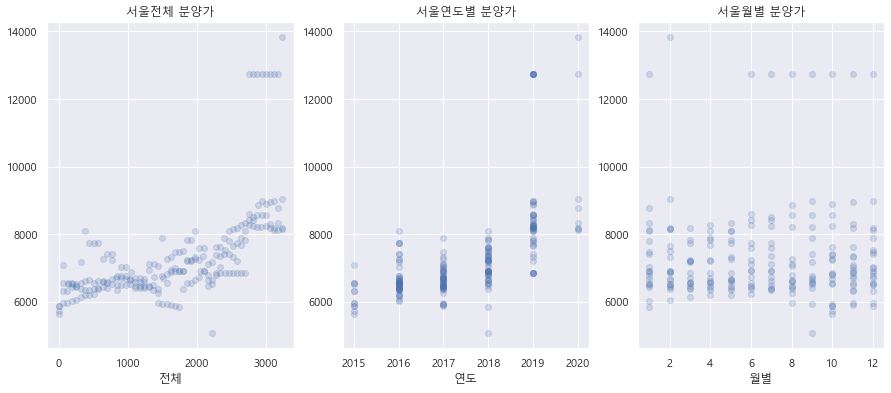

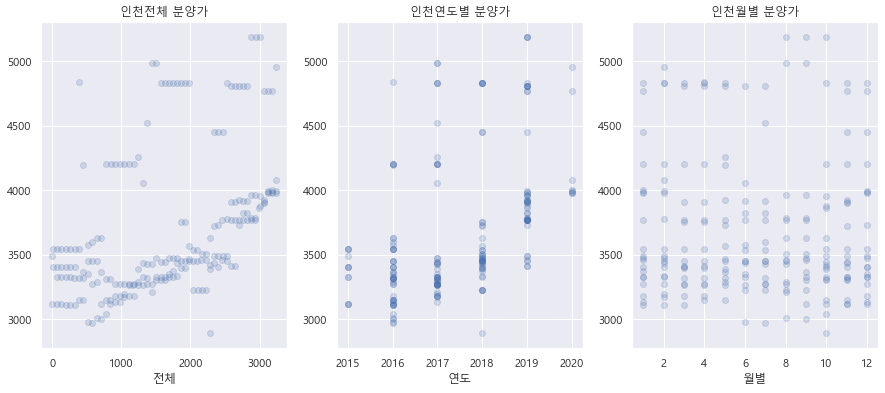

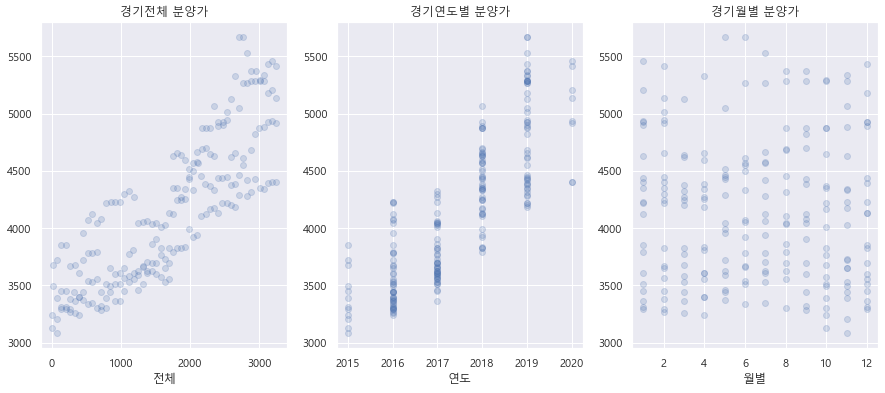

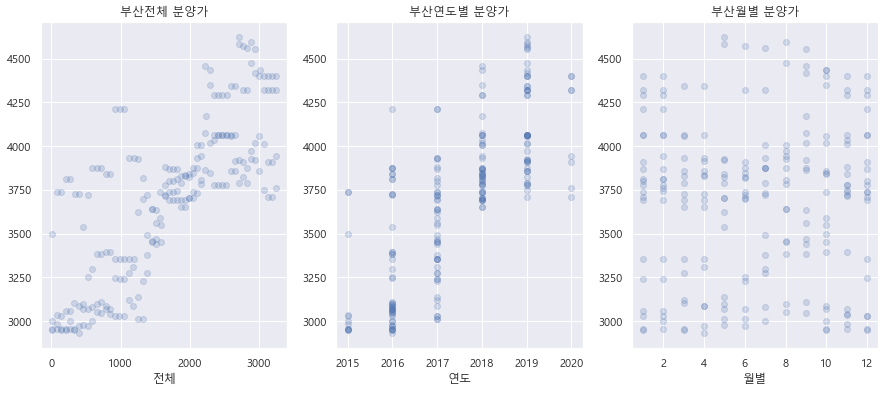

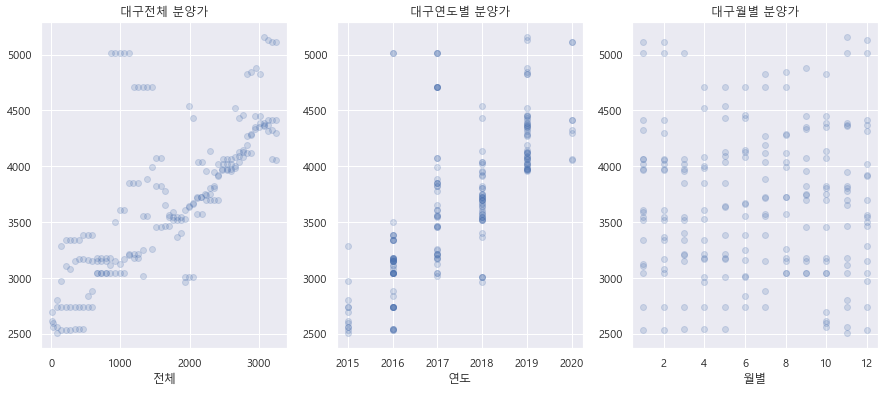

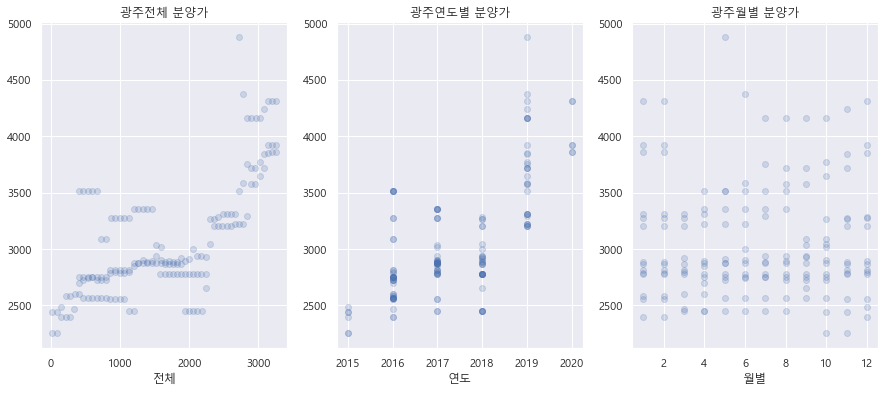

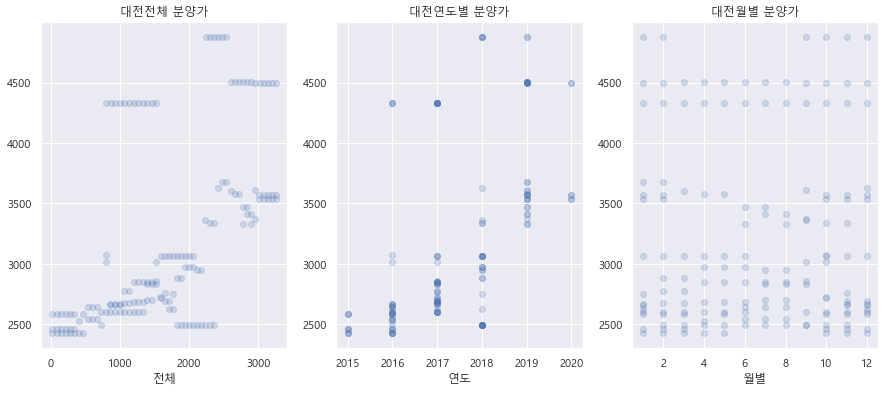

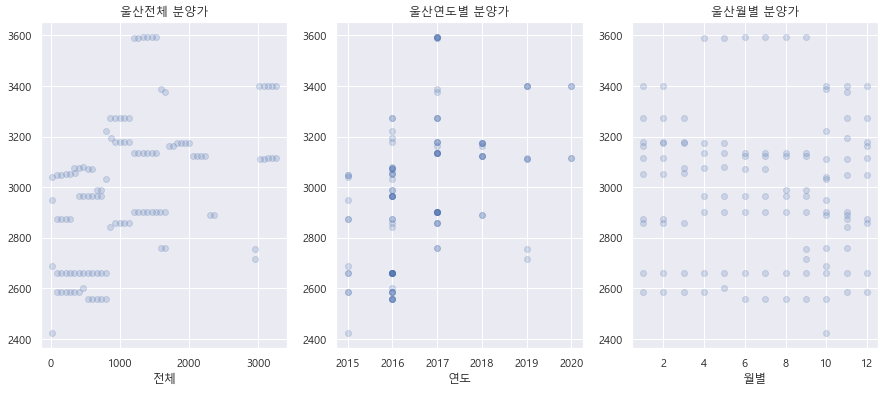

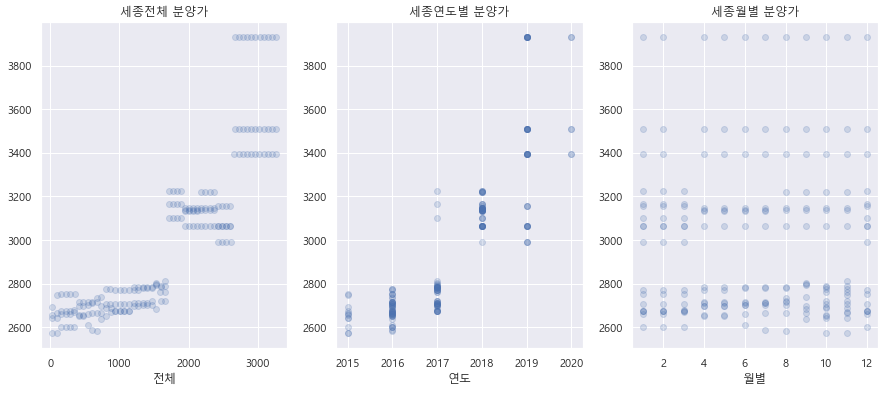

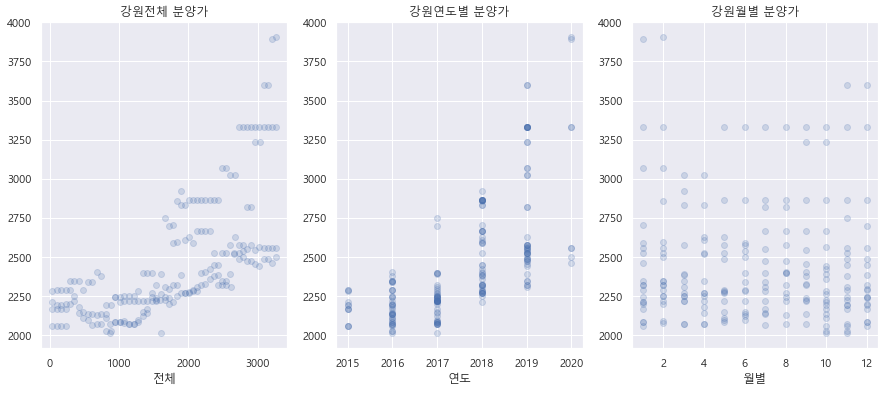

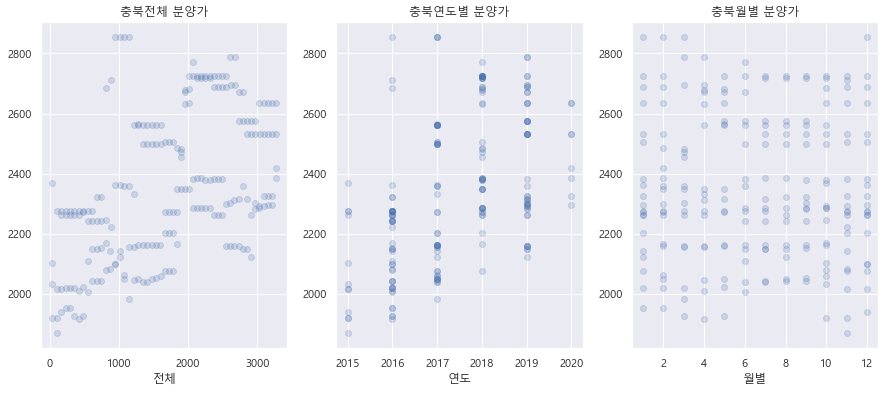

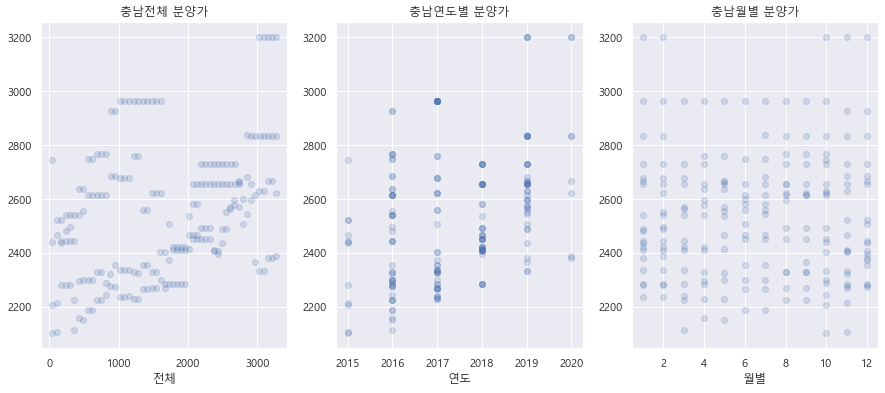

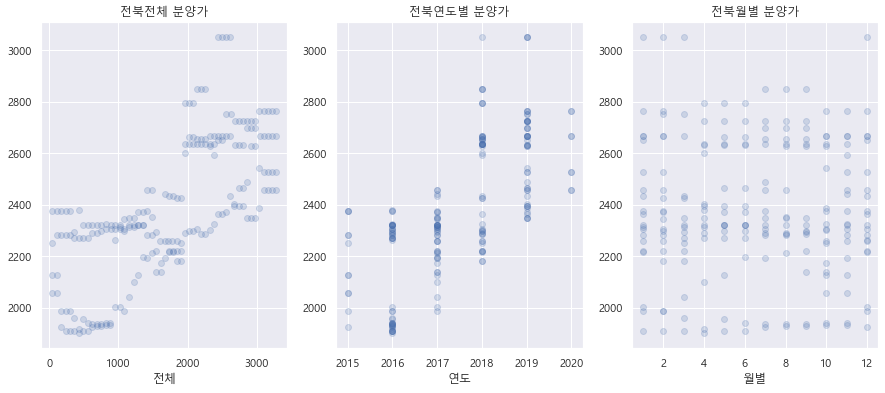

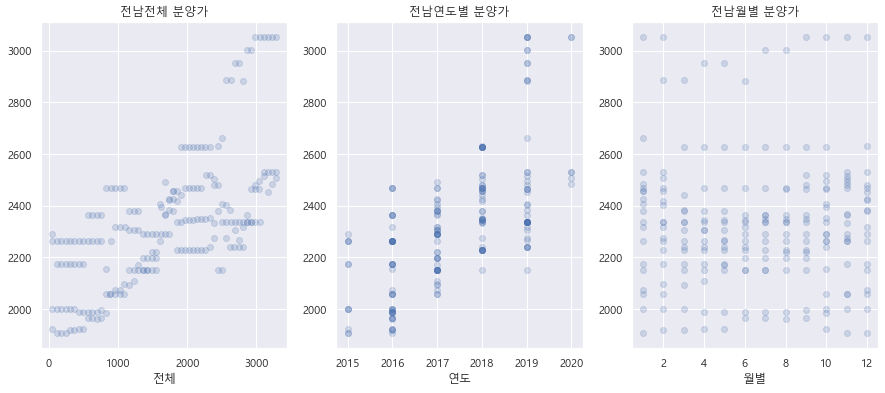

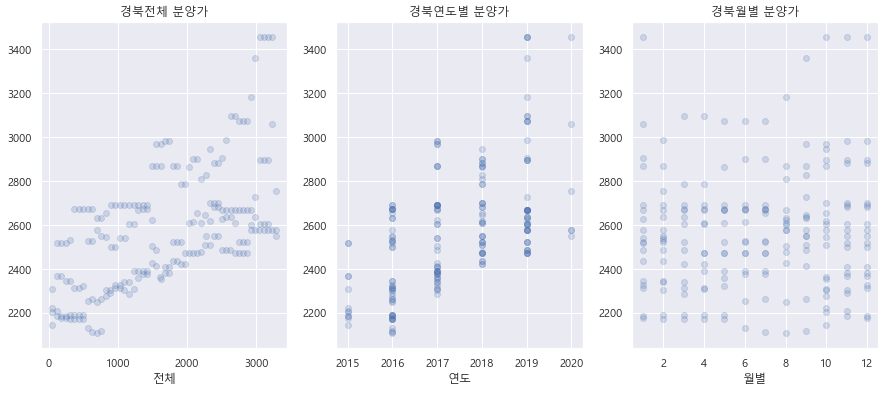

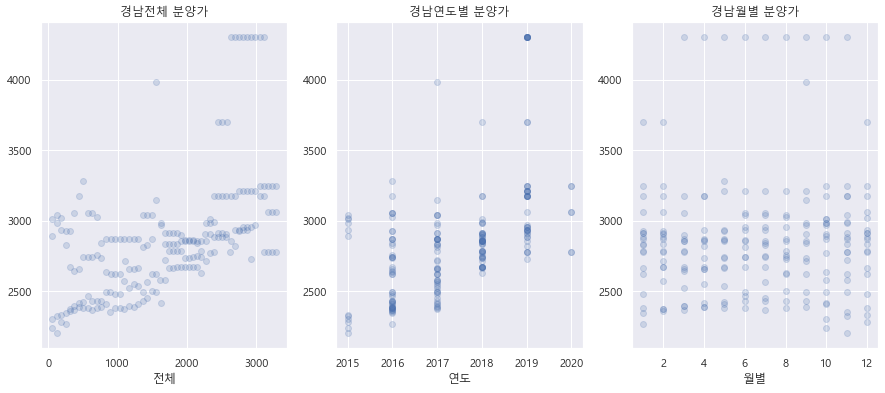

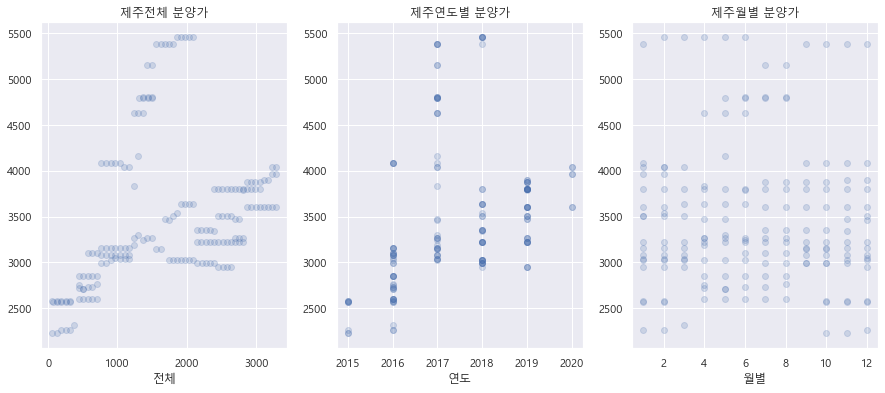

In [114]:
for name in names:
    tmp = df[df['지역'] == name]
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    plt.scatter(tmp.index, tmp['분양가'], alpha=0.2)
    plt.title(f'{name}전체 분양가')
    plt.xlabel('전체')
    plt.subplot(1,3,2)
    plt.scatter(tmp['연도'], tmp['분양가'], alpha=0.2)
    plt.title(f'{name}연도별 분양가')
    plt.xlabel('연도')
    plt.subplot(1,3,3)
    plt.scatter(tmp['월'], tmp['분양가'], alpha=0.2)
    plt.title(f'{name}월별 분양가')
    plt.xlabel('월별')
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12156\1643875143.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(10), np.log(np.arange(10)), label='abc3')


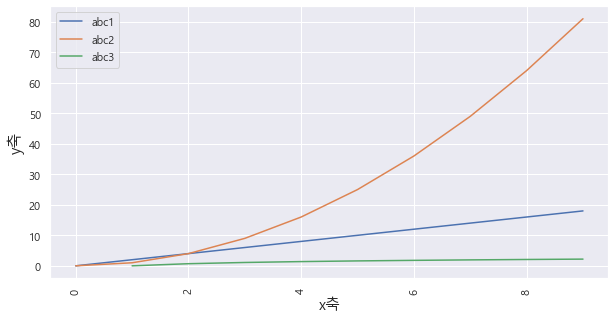

In [123]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(10), np.arange(10)*2, label='abc1')
plt.plot(np.arange(10), np.arange(10)**2, label='abc2')
plt.plot(np.arange(10), np.log(np.arange(10)), label='abc3')

plt.xlabel('x축', fontsize=15)
plt.ylabel('y축', fontsize=15)
plt.xticks(rotation=90)
# plt.legend(['10*2','10**2','log10'])
plt.legend()
plt.show()

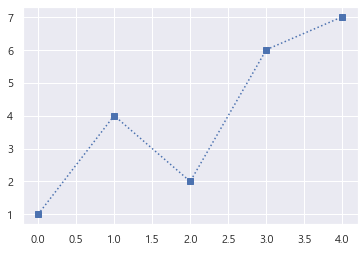

In [125]:
a=[1,4,2,6,7]
plt.plot(a, ':sb')